In [1]:
import numpy as np
import pandas as pd

from scipy.io import loadmat
from scipy import stats

from sklearn.metrics import precision_recall_fscore_support
from sklearn.covariance import EllipticEnvelope

import seaborn as sns
sns.set()

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
PATH = '../input/andrew_ng/ex8/'

In [3]:
!ls {PATH}

ex8data1.mat  ex8data2.mat  ex8_movieParams.mat  ex8_movies.mat


In [4]:
data1 = loadmat(PATH+'ex8data1.mat')

In [5]:
data1.keys()

dict_keys(['__header__', 'Xval', 'X', 'yval', '__globals__', '__version__'])

In [6]:
X, Xval, yval = data1['X'], data1['Xval'], data1['yval']
X.shape, Xval.shape, yval.shape

((307, 2), (307, 2), (307, 1))

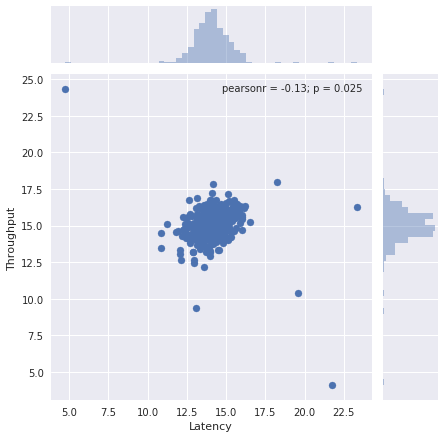

In [7]:
sns.jointplot(X[:,0], X[:,1]).set_axis_labels(xlabel='Latency', ylabel='Throughput')

In [8]:
mu, var = X.mean(axis=0), X.var(axis=0)
mu, var

(array([14.11222578, 14.99771051]), array([1.83263141, 1.70974533]))

In [9]:
pd = np.zeros(X.shape)
pd[:,0] = stats.norm(mu[0], var[0]).pdf(X[:,0])
pd[:,1] = stats.norm(mu[1], var[1]).pdf(X[:,1])

pd_val = np.zeros(X.shape)
pd_val[:,0] = stats.norm(mu[0], var[0]).pdf(Xval[:,0])
pd_val[:,1] = stats.norm(mu[1], var[1]).pdf(Xval[:,1])

pd.shape, pd_val.shape

((307, 2), (307, 2))

In [10]:
def select_threshold(pval, yval):
    best_eps, best_f1, f1 = 0, 0, 0
    
    step = (pval.max() - pval.min()) / 1000
    
    for eps in np.arange(pval.min(), pval.max(), step):
        preds = pval < eps
        tp = np.sum((preds == 1)*(yval == 1))
        fp = np.sum((preds == 1)*(yval == 0))
        fn = np.sum((preds == 0)*(yval == 1))
        
        P = tp / (tp + fp)  # precision
        R = tp / (tp + fn)  # recall
        f1 = (2 * P * R) / (P + R)
        if f1 > best_f1:
            best_f1 = f1
            best_eps = eps
    
    return best_eps, best_f1

epsilon, f1 = select_threshold(pd_val, yval)

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in long_scalars
  if sys.path[0] == '':


In [11]:
outliers = np.where(pd<epsilon)
outliers

(array([300, 301, 301, 303, 303, 304, 306, 306]),
 array([1, 0, 1, 0, 1, 0, 0, 1]))

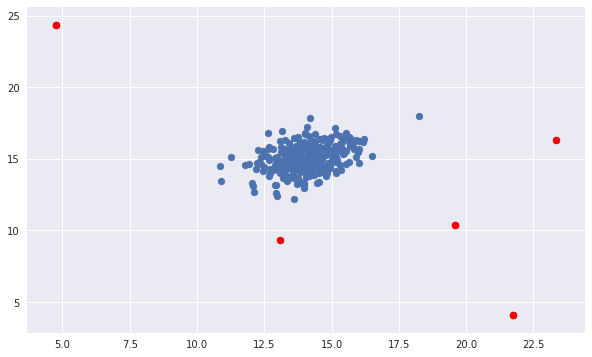

In [12]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(X[:,0], X[:,1])
ax.scatter(X[outliers[0],0], X[outliers[0],1], s=50, color='r', marker='o')

In [13]:
classifier = EllipticEnvelope()
classifier.fit(X)

EllipticEnvelope(assume_centered=False, contamination=0.1, random_state=None,
         store_precision=True, support_fraction=None)

In [14]:
y_ = classifier.decision_function(X)

In [15]:
threshold = np.percentile(y_, 1.5)
a = y_ < threshold

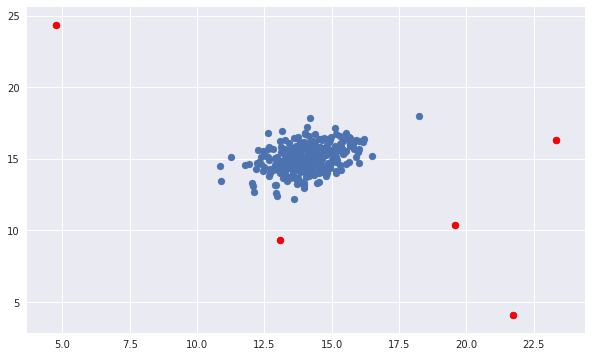

In [16]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(X[:,0], X[:,1])
ax.scatter(X[a,0], X[a,1], color='r', marker='o');

In [17]:
data2 = loadmat(PATH+'ex8data2.mat')
data2.keys()

dict_keys(['__header__', 'Xval', 'X', 'yval', '__globals__', '__version__'])

In [18]:
X, Xval, yval = data2['X'], data2['Xval'], data2['yval']
X.shape, Xval.shape, yval.shape

((1000, 11), (100, 11), (100, 1))

In [19]:
classifier.fit(X)
y_ = classifier.decision_function(X)

threshold = np.percentile(y_, 2)
a = y_ < threshold

In [20]:
classifier.score(Xval, yval)

0.02

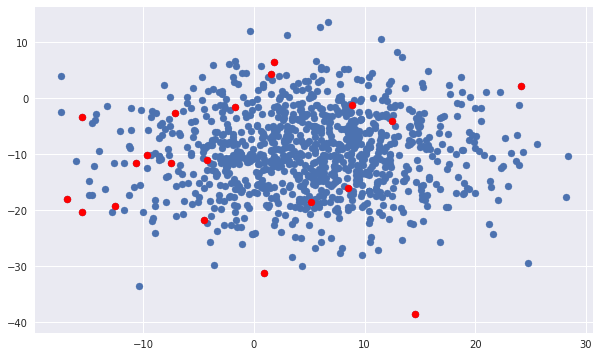

In [21]:
dim0, dim1 = 0, 1
fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(X[:,dim0], X[:,dim1])
ax.scatter(X[a,dim0], X[a,dim1], s=50, color='r', marker='o');

### Recommender System

In [22]:
movies_data = loadmat(PATH+'ex8_movies.mat')
movies_data.keys()

dict_keys(['__header__', 'Y', 'R', '__globals__', '__version__'])

In [23]:
R, Y = movies_data['R'], movies_data['Y']
R.shape, Y.shape

((1682, 943), (1682, 943))

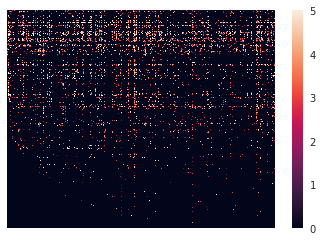

In [24]:
sns.heatmap(Y, xticklabels=False, yticklabels=False)